In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from random import random

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim

In [4]:
from models import ModelManager, ModelType
from utils import MnistData

In [5]:
data = MnistData()

## Training

In [6]:
generator = ModelManager.get_untrained(ModelType.GeneratorConv)
discriminator = ModelManager.get_untrained(ModelType.DiscriminatorConv)

In [7]:
batch = 100
# batch_of_real_data, _ = data.get_training_batch(batch)
# batch_of_noise = torch.rand(batch, 100)

In [9]:
discriminator_optimizer = optim.Adam(discriminator.parameters(), lr=2e-4)
generator_optimizer = optim.Adam(generator.parameters(), lr=2e-4)


for epoch in range(600 * 200):
    # sampling
    batch_of_real_data, _ = data.get_training_batch(batch)
    batch_of_noise = torch.rand(batch, 100)
    
    # zero grad
    generator_optimizer.zero_grad()
    discriminator_optimizer.zero_grad()

    # predictions
    batch_of_generated = generator(batch_of_noise)
    batch_of_generated_discrimination = discriminator(batch_of_generated)
    batch_of_real_discrimination = discriminator(batch_of_real_data)

    # computing loss
    discriminator_loss = nn.BCELoss()(batch_of_generated_discrimination, torch.zeros(batch, 1)) \
        + nn.BCELoss()(batch_of_real_discrimination, torch.ones(batch, 1))
    discriminator_loss /= 2
    discriminator_loss.backward()

    discriminator_optimizer.step()

    batch_of_generated = generator(batch_of_noise)
    batch_of_generated_discrimination = discriminator(batch_of_generated)

    generator_loss = nn.BCELoss()(batch_of_generated_discrimination, torch.ones(batch, 1))
    discriminator_optimizer.zero_grad()
    generator_optimizer.zero_grad()
    generator_loss.backward()

    generator_optimizer.step()
    # log
    if (epoch + 1) % 10 == 0:
        print(f'---{epoch}:D:{discriminator_loss.item()}:G:{generator_loss.item()}---')
        MnistData.display(batch_of_generated[0], scale=True)

KeyboardInterrupt: 

## Check

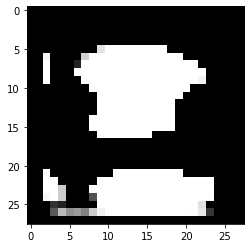

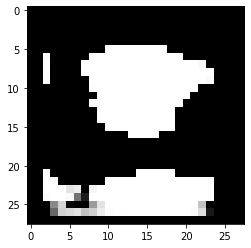

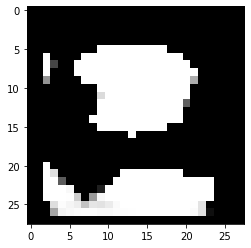

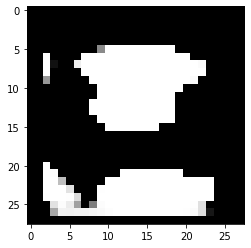

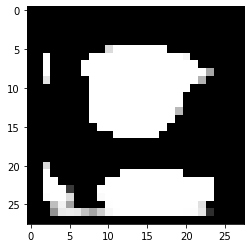

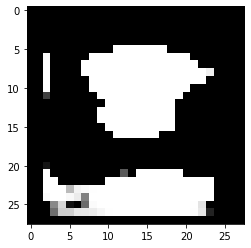

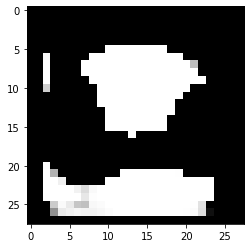

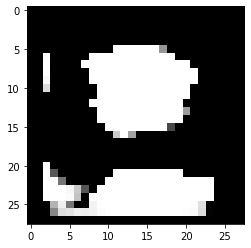

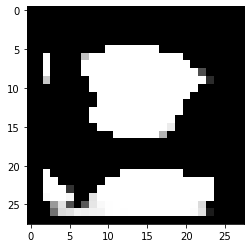

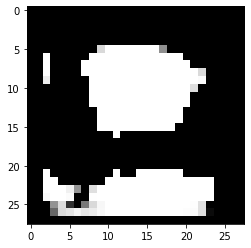

In [10]:
examples = generator(torch.rand(10, 100))

for i in range(10):
    MnistData.display(examples[i], scale=True)